# Module 8: Linear/Logistic Regression

## Topic 1: Linear Regression

### Simple, Single Linear Regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

### Let's create some simple data

In [2]:
ind_x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
dep_y = np.array([5, 20, 14, 32, 22, 38])
print(ind_x,dep_y,sep="\n")

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


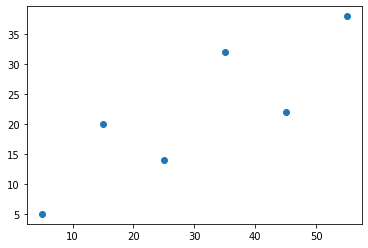

In [3]:
import matplotlib.pyplot as plt
plt.scatter(ind_x,dep_y)
plt.show()

### With our data ready, we can create our linear regression model and fit it to our data

In [4]:
model = LinearRegression()

In [5]:
model.fit(ind_x, dep_y)
# model = LinearRegression().fit(x, y) equivalent to the above 2 commands

LinearRegression()

### Now we are able to take a look at how we did with our model.

In [6]:
r_sq_err = model.score(ind_x, dep_y)
print('coefficient of determination/R^2:', r_sq_err, end='\n\n') # Model Fit: 1 is a perfect (over)fit
#print(type(r_sq_err))
print('intercept:', model.intercept_, end='\n\n')
print('slope:', model.coef_, end='\n\n')

coefficient of determination/R^2: 0.715875613747954

intercept: 5.633333333333329

slope: [0.54]



### We can also visualize the results

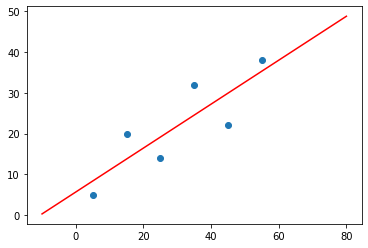

In [7]:
import matplotlib.pyplot as plt
x_lin_line = np.linspace(-10,80,100)
#print((x_lin_line))
y_lin_line = model.coef_*x_lin_line + model.intercept_
#print(y_lin_line)
plt.scatter(ind_x,dep_y)
plt.plot(x_lin_line,y_lin_line, color = 'r')
plt.show()

### With our model created, we can also pass it data to see the predictions.  
### Let's feed it our training data first

In [8]:
y_pred = model.predict(ind_x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


### Let's also throw some independent variables at our model to see the predictions

In [9]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print('predicted output: ',y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
predicted output:  [5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


### And finally, let's create an operationalized model to make it easy to use our model

In [10]:
def lin_regression(ind_var):
    trans_ind_var=(np.array([ind_var]).reshape(-1,1))
    return model.predict(trans_ind_var)

print("The prediction is: ",lin_regression(float(input("give me an independent variable: "))))

give me an independent variable: 5
The prediction is:  [8.33333333]


### Multiple (multivariate) linear regression
### We don't have to limit ourselves to a single independent variable.  We can have many of them.  The resultant model will also be in more dimensions.  For this next example, we are going to have two independent variables so our linear regression line will become a plane in 3D space.

In [11]:
x2 = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y2 = [4, 5, 20, 14, 32, 22, 38, 43]
x_mult, y_mult = np.array(x2), np.array(y2)
print(x_mult,y_mult,sep='\n\n')

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]

[ 4  5 20 14 32 22 38 43]


In [12]:
model2 = LinearRegression().fit(x_mult, y_mult)

In [13]:
r_sq2 = model2.score(x_mult, y_mult)
print('coefficient of determination/R^2:', r_sq2, end='\n\n')
print('intercept:', model2.intercept_, end='\n\n')
print('slope:', model2.coef_, end='\n\n')

coefficient of determination/R^2: 0.8615939258756775

intercept: 5.52257927519819

slope: [0.44706965 0.25502548]



In [14]:
y_pred2 = model2.predict(x_mult)
print('predicted response:', y_pred2, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


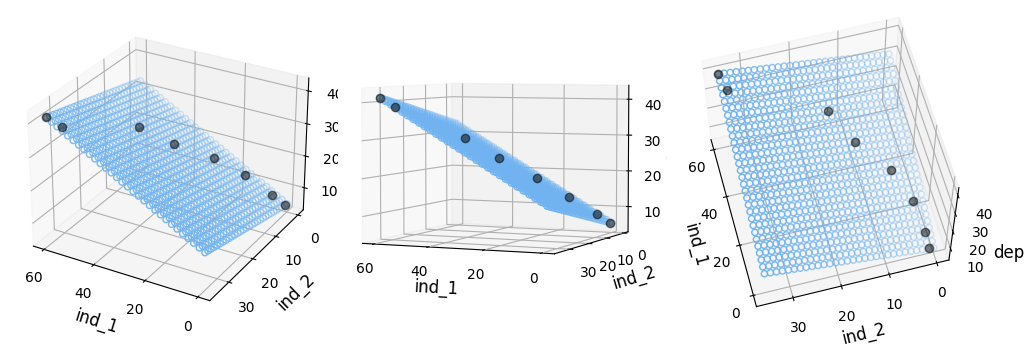

In [15]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

# Setting up empty 3D plot
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

# mapping my variables to existing code to create plot (confusing mess)
x = [item[0] for item in x2]
y = [item[1] for item in x2]
z = y_pred2
x_pred = np.linspace(0,60,30)
y_pred = np.linspace(0,35,30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
ols = y_pred2
model = model2
predicted = model.predict(model_viz)

#adding data to plots
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('ind_1', fontsize=12)
    ax.set_ylabel('ind_2', fontsize=12)
    ax.set_zlabel('dep', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# Displaying plots
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
fig.tight_layout()

In [16]:
x_new2 = np.arange(10).reshape((-1, 2)) # Try model on some data
print(x_new2)
y_new2 = model2.predict(x_new2)
print(y_new2)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [17]:
def mult_lin_regression(indep_var_1,indep_var_2):
    trans_input=np.array([indep_var_1,indep_var_2]).reshape(-1,2)
    return model2.predict(trans_input)

print("The prediction is: ",mult_lin_regression(float(input("give me the first independent variable: ")),
                                                float(input("give me the second independent variable: "))))

give me the first independent variable: 4
give me the second independent variable: 7
The prediction is:  [9.09603624]


### Polynomial Regression (curvy lines instead of straight ones)

### We can use polynomial regression to try to better fit the data.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
x2 = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y2 = np.array([15, 11, 2, 8, 25, 32])
print(x2,y2,sep="\n\n")

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]

[15 11  2  8 25 32]


In [19]:
transformer = PolynomialFeatures(degree=2, include_bias=False) # Vary degrees

In [20]:
transformer.fit(x2) 

PolynomialFeatures(include_bias=False)

In [21]:
x2_poly = transformer.transform(x2)
print(x2_poly)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [22]:
model_poly = LinearRegression().fit(x2_poly, y2)

In [23]:
r_sq_poly = model_poly.score(x2_poly,y2)
print('coefficient of determination: ', r_sq_poly)
print('intercept: ',model_poly.intercept_)
print('coefficients: ',model_poly.coef_)

coefficient of determination:  0.8908516262498564
intercept:  21.372321428571425
coefficients:  [-1.32357143  0.02839286]


In [24]:
y_pred_poly = model_poly.predict(x2_poly)
print('predicted response: ', y_pred_poly,sep='\n')

predicted response: 
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


[-1.32357143  0.02839286] 21.372321428571425


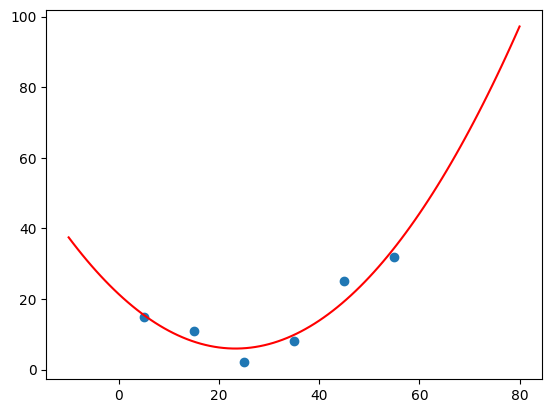

In [25]:
import matplotlib.pyplot as plt
x_poly_line = np.linspace(-10,80,100)
#print((x_poly_line))
print(model_poly.coef_,model_poly.intercept_)
y_poly_line = model_poly.coef_[1]*x_poly_line**2 + model_poly.coef_[0]*x_poly_line + model_poly.intercept_
#print(y_lin_line)
plt.scatter(x2,y2)
plt.plot(x_poly_line,y_poly_line, color = 'r')
plt.show()

## Topic 2: Logistic Regression

* Precision
    * Reflects the ratio of correctly classified positives to total positives
    * Calculated as TP / (TP + FP)
* Recall/Sensitivity
    * Reflects the ratio of correctly classified positives to true positive and false negative cases. 
    * It tells us how well the model predicts positives.
    * Calculated as TP/(TP+FN)
    * Result is a number between zero and 1.  The closer to 1, the more accurately the model predicts the positive cases
* Specificity
    * Reflects the ratio of correctly classified negatives to true negatives and false positive cases
    * It tells us how well the model predicts negatives.
    * Calculated as TN/(TN+FP)
    * Result is a number between zero and 1.  The closer to 1, the more accurately the model predicts the positive cases
* f1-score 
    * Summarizes both precision and recall by taking the mean of both
    * An F1 score of 1 indicates perfect precision and recall.
    * Calculated as 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

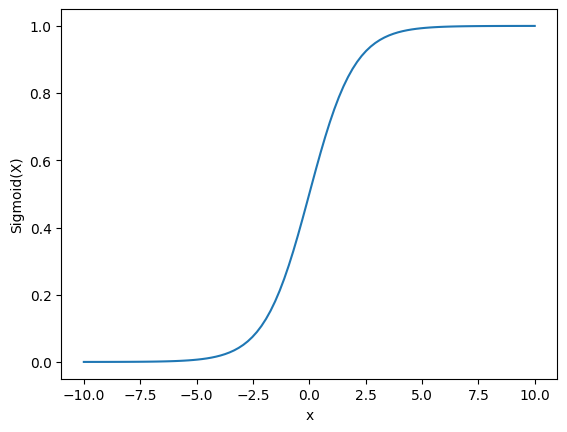

In [26]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
x_log = np.arange(10).reshape(-1, 1)
y_log = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x_log,y_log, sep='\n\n') 

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

[0 0 0 0 1 1 1 1 1 1]


In [30]:
model_log = LogisticRegression(solver='liblinear', random_state=0)

In [31]:
model_log.fit(x_log, y_log)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model_log = LogisticRegression(solver='liblinear', random_state=0).fit(x_log, y_log)

In [32]:
print('classes: ',model_log.classes_)
print('intercept: ',model_log.intercept_)
print('coefficient: ', model_log.coef_)

classes:  [0 1]
intercept:  [-1.04608067]
coefficient:  [[0.51491375]]


In [33]:
model_log.predict_proba(x_log)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

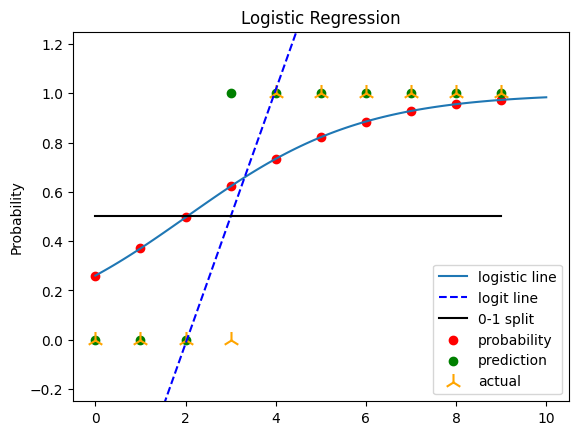

In [34]:
from scipy.special import expit

plot_array = model_log.predict_proba(x_log)
x_log_line = np.linspace(-0,10,100)
y_logit = (model_log.coef_*x_log_line + model_log.intercept_).ravel()
y_log_line = expit(model_log.coef_*x_log_line + model_log.intercept_).ravel()

plt.scatter(x_log,plot_array[:,1],color='red',label = 'probability')
plt.plot(x_log_line,y_log_line,label='logistic line')
plt.plot(x_log_line,y_logit,'b--',label='logit line')
plt.scatter(x_log,model_log.predict(x_log),color='green', label='prediction')
plt.scatter(x_log,y_log,marker="2",s=150,color = 'orange', label = 'actual')
plt.plot(x_log,np.full((10,1),0.5),color = 'black', label = '0-1 split')
plt.plot()

plt.title("Logistic Regression")
plt.legend(loc='lower right')
plt.ylabel("Probability")
plt.ylim([-.25,1.25])
plt.show()

In [35]:
print(model_log.predict(x_log))

[0 0 0 1 1 1 1 1 1 1]


In [36]:
model_log.score(x_log,y_log)

0.9

In [37]:
confusion_matrix(y_log,model_log.predict(x_log))

array([[3, 1],
       [0, 6]], dtype=int64)

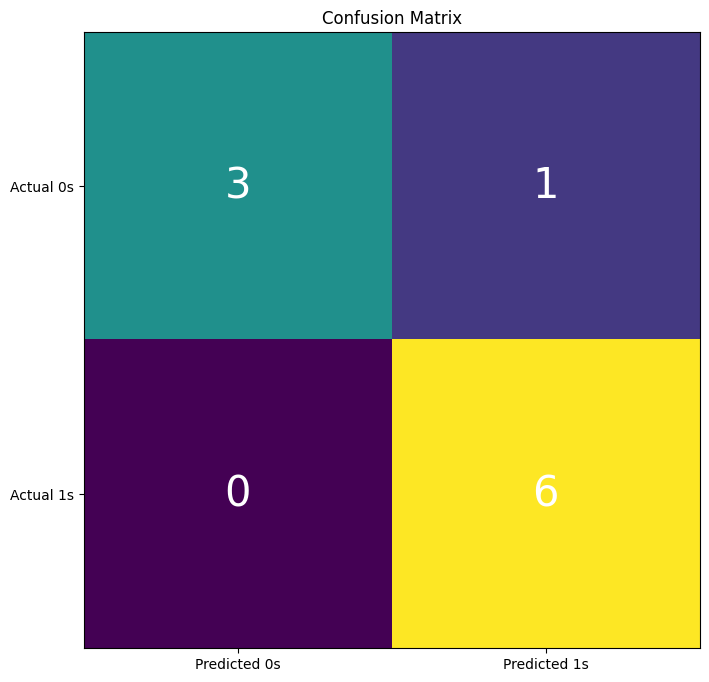

In [38]:
cm = confusion_matrix(y_log, model_log.predict(x_log))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', size=30,color='white')
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(y_log, model_log.predict(x_log)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Topic 3: Logistic Regression Real Example

### BIG LOGISTIC ~~PROBLEM~~ OPPORTUNITY

### For this problem we are going to create a model that attempts to predict employee turnover based on months served, age, extraversion score, independence score, and anxiety score

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
turnover_df = pd.read_csv('turnover.csv', encoding="mbcs")

In [41]:
print(turnover_df.columns)
turnover_df.head()

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [42]:
dep_y_log_big = turnover_df['event'].to_numpy()
print(dep_y_log_big)
ind_x_log_big = turnover_df[['stag','age','extraversion','independ','anxiety']].to_numpy()
print(ind_x_log_big)
print(ind_x_log_big.shape,dep_y_log_big.shape)

[1 1 1 ... 0 0 0]
[[  7.03080082  35.           6.2          4.1          7.1       ]
 [ 22.9650924   33.           6.2          4.1          7.1       ]
 [ 15.93429158  35.           6.2          6.2          4.8       ]
 ...
 [118.8008214   34.           4.6          5.5          6.3       ]
 [ 49.41273101  51.           3.8          7.6          6.3       ]
 [ 24.83778234  29.           9.4          1.2          5.6       ]]
(1129, 5) (1129,)


### To do this right, we need to know split our dataset into test and train

In [43]:
x_train, x_test, y_train, y_test = train_test_split(ind_x_log_big,dep_y_log_big, test_size=0.3, random_state = 0)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(x_train)
print(y_train)

(790, 5) (339, 5)
(790,) (339,)
[[12.02464066 30.          5.4         4.1         6.3       ]
 [79.86858316 23.          5.4         5.5         8.7       ]
 [88.90349076 30.          4.6         2.6         7.1       ]
 ...
 [ 0.6899384  24.          4.6         7.6         2.5       ]
 [86.66940452 25.          5.4         5.5         5.6       ]
 [ 8.3449692  35.          5.4         6.9         7.9       ]]
[1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 

In [44]:
model_big = LogisticRegression(solver='liblinear', C = 0.05, multi_class='ovr', random_state = 0)
result = model_big.fit(x_train,y_train)
print(classification_report(y_train, result.predict(x_train)))

              precision    recall  f1-score   support

           0       0.54      0.36      0.43       384
           1       0.54      0.71      0.62       406

    accuracy                           0.54       790
   macro avg       0.54      0.54      0.52       790
weighted avg       0.54      0.54      0.53       790



In [45]:
output = result.predict(x_train)
# print((output))
test_output = result.predict(x_test)
#print(test_output)
print(classification_report(y_test, model_big.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41       174
           1       0.49      0.68      0.57       165

    accuracy                           0.50       339
   macro avg       0.51      0.51      0.49       339
weighted avg       0.51      0.50      0.49       339



In [46]:
# print(x_train,y_train, sep='\n\n')
# print(x_train.shape,y_train.shape)
print(model_big.score(x_train,y_train))
print(model_big.score(x_test,y_test))

0.5417721518987342
0.504424778761062


In [47]:
#print(y_test,test_output, sep='\n\n')
confusion_matrix(y_test,test_output)

array([[ 58, 116],
       [ 52, 113]], dtype=int64)